### **Punto 1.3**

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z)**2+1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,1) 
    r2 = complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels




Se realizo la modificacion de la funcion por f(z)=(z-1)**2, tambien tenemos que para esta función tiene una unica raíz en r1=1, tambien se realizo la modificacion del codigo de colores para poner uno para mayor contraste con el color negro

Text(0, 0.5, 'f(x)')

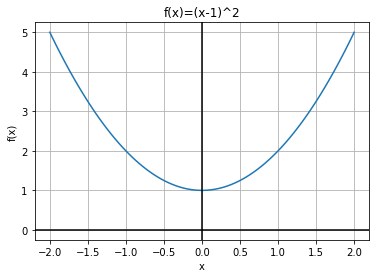

In [50]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')




## **Punto 2.3**

# *Método Clásico*

In [57]:
import math 

a = float(1)
b = float(0)
c = float(1)

if a==0:
    print("El coeficiente a no puede ser igual a cero")
else:
    discriminante = b**2 - 4 * a * c
    if discriminante >= 0:
        if discriminante == 0:
            x = -b / (2 * a)
            print("La raíz única es {:.3f}".format(x))
        else:
            x1 = (-b + math.sqrt(discriminante)) / (2 * a)
            x2 = (-b - math.sqrt(discriminante)) / (2 * a)
            print("La raíz real x1 es {:.3f}".format(x1))
            print("La raíz real x2 es {:.3f}".format(x2))
    else:
        discriminante = abs(discriminante)
        parteReal = -b / (2 * a)
        parteImaginaria = math.sqrt(discriminante) / (2 * a)
        print("La raíz compleja x1 es {:.3f} + {:.3f}i".format(parteReal, parteImaginaria))
        print("La raíz compleja x2 es {:.3f} - {:.3f}i".format(parteReal, parteImaginaria)) 

La raíz compleja x1 es -0.000 + 1.000i
La raíz compleja x2 es -0.000 - 1.000i


Como podemos comprobar por el método clásico de la ecuación cuadratica r1=1.00 y r1=-1.0

# *Método Po Shen Loh*

In [58]:
import math
import numpy 

a = float(1)
b = float(0)
c = float(1)

NotReal = False 
b = b/a
c = c/a
disc = ((b**2)/4) - c
if disc < 0:
  disc = disc * -1
  NotReal = True 
  
r1 = -(b/2) + math.sqrt(disc)
r2 = +(b/2) - math.sqrt(disc)
string = "No real = " + str(NotReal)
if NotReal==True:
    string = "imaginaria"
else:
    string = "real"


print("r = ",r1,r2,string)

r =  1.0 -1.0 imaginaria


### **Punto 3.2**

In [61]:
def display1(z_c_r=0, z_c_i=1, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , 0.5 ) to ( 0.5 , 1.5 )


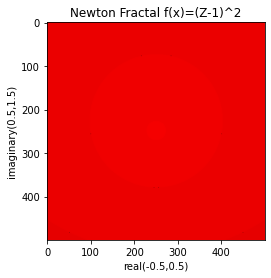

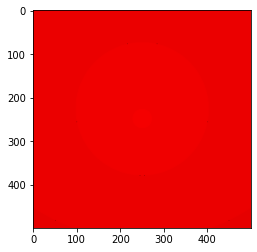

Z region from ( -1.0 , 0.0 ) to ( 1.0 , 2.0 )


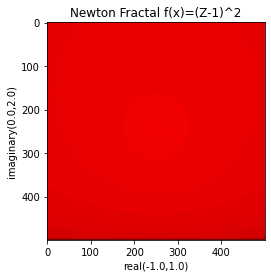

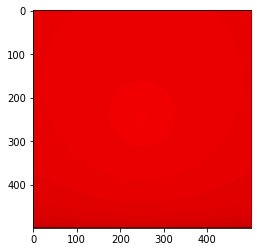

Z region from ( -1.5 , -0.5 ) to ( 1.5 , 2.5 )


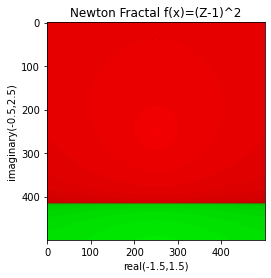

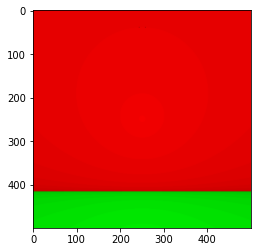

Z region from ( -2.0 , -1.0 ) to ( 2.0 , 3.0 )


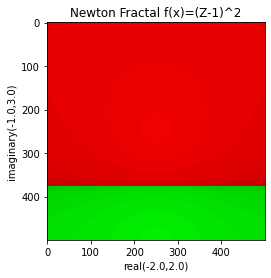

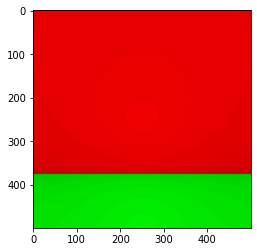

Z region from ( -2.5 , -1.5 ) to ( 2.5 , 3.5 )


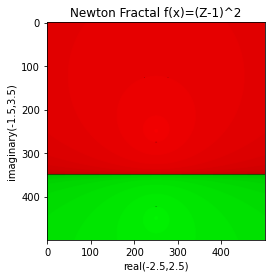

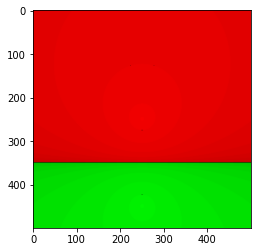

In [62]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

Defini un nuevo display 2 para visualizar el fractar sin cambiar la escala inicial zoom=1, dado que en este caso vamos a realizar un acercamiento hacia el fractal, es decir vamos a reducir la escala "Zoom In" para visualizar el fractal en mas detalle. Tambien se realiza la translacion de una 1 a la derecha.

In [63]:
def display2(z_c_r=1, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom in
Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


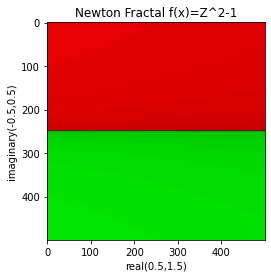

Z region from ( 0.75 , -0.25 ) to ( 1.25 , 0.25 )


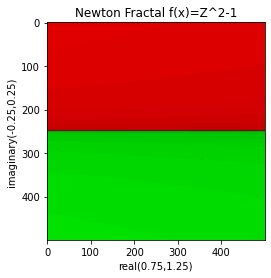

Z region from ( 0.8333333333333334 , -0.16666666666666666 ) to ( 1.1666666666666667 , 0.16666666666666666 )


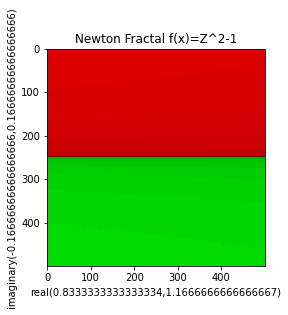

Z region from ( 0.875 , -0.125 ) to ( 1.125 , 0.125 )


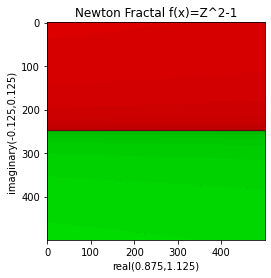

Z region from ( 0.9 , -0.1 ) to ( 1.1 , 0.1 )


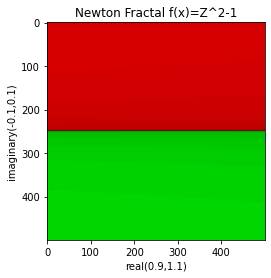

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


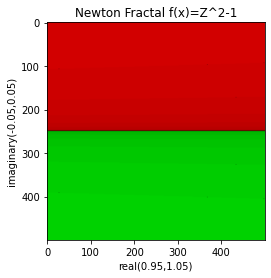

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


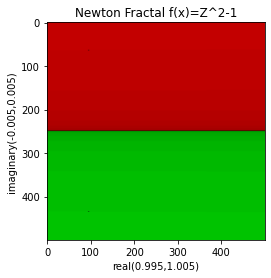

Z region from ( 0.9995 , -0.0005 ) to ( 1.0005 , 0.0005 )


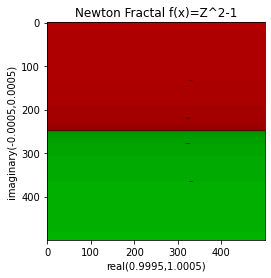

In [64]:
print("zoom in")
display2(zoom=1)
display2(zoom=1/2)
display2(zoom=1/3)
display2(zoom=1/4)
display2(zoom=1/5)
display2(zoom=1/10)
display2(zoom=1/100)
display2(zoom=1/1000)

## **Punto 4.2**

## Newton iterates form z=10.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=10.0 +0.0j. 

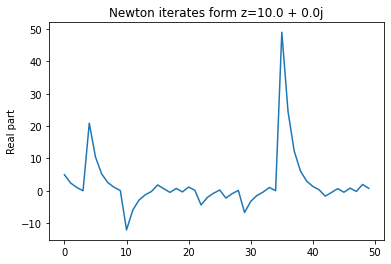

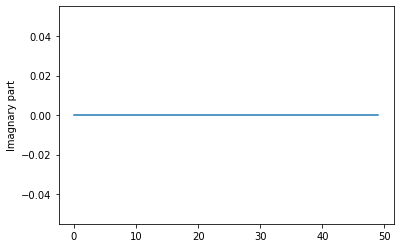

In [65]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Visualizamos que la parte real de f(z) es inestable, lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson r1=1.0j. En cuanto a la raíz imaginaria podemos ver que tiende a 0.

## Newton iterates form z=-10.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=-10.0 +0.0j.

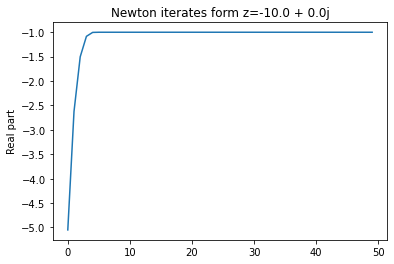

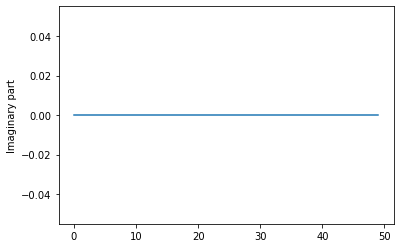

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z) crece en las primeras 10 iteraciones hasta estabilizarse en un valor de -1, lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson r1=-1. En cuanto a la raíz imaginaria podemos ver que tiende a 0.

## Newton iterates form z=0.0 + 10.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 + 10.0j

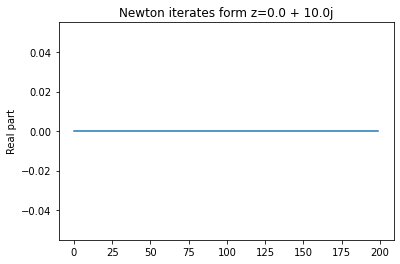

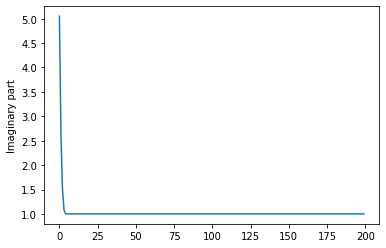

In [66]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z) tiene que iterar entre los valores de sus raices haciendo que estas se anulen mutiamente por lo cual la parte real de nuestra funcion f(z) es nula. En cuanto a la raíz imaginaria en este caso esta dada por r=-1, itera constante mente pero ce aproxima a cero.

## Newton iterates form z=0.0 - 10.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 - 10.0j

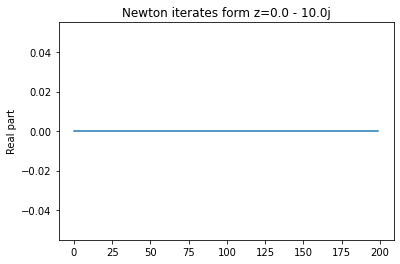

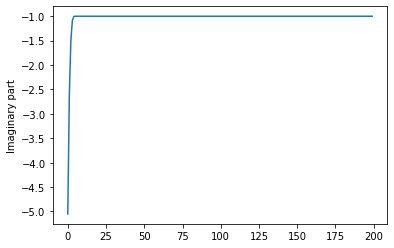

In [67]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z),no tiene que iterar decreciendo hasta alcanzar el valor de su raíz puesto que r1=1 lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson. En cuanto a la raíz imaginaria en este caso podemos ver que crece durante las primeras 10 iteraciones hasta estabilizarse en un valos 0.0j.

## **Punto 5.2**

## Newton iterates form z=0.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 - 0.0j.

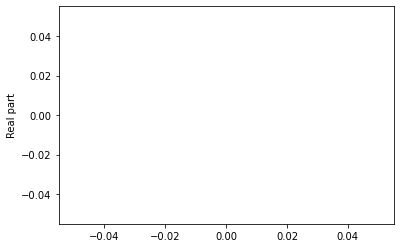

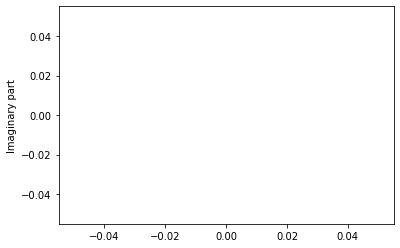

In [70]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(0):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

En este caso en de la iteración 0 se haya el valor de la raíz por lo que esto se corrije pasandole 0 en el parametro de la función range()